In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# loading the dataset to pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Age Distribution')

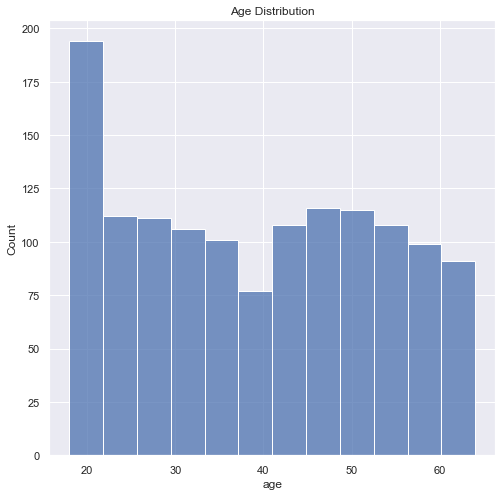

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(8, 8))
sns.histplot(insurance_dataset['age'])
plt.title("Age Distribution")

In [9]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'BMI Distribution')

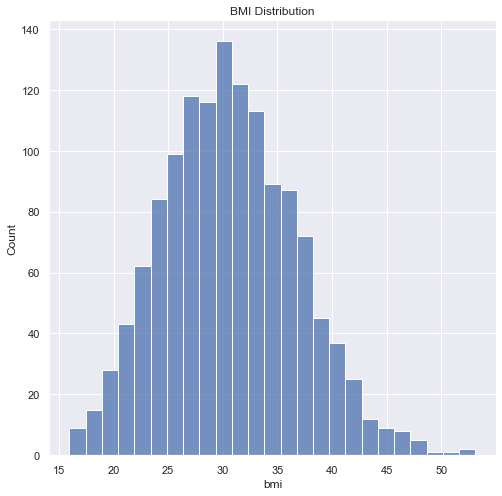

In [10]:
# bmi distribution
sns.set()
plt.figure(figsize=(8, 8))
sns.histplot(insurance_dataset['bmi'])
plt.title("BMI Distribution")

Normal BMI is 18 to 24

Text(0.5, 1.0, 'Children Distribution')

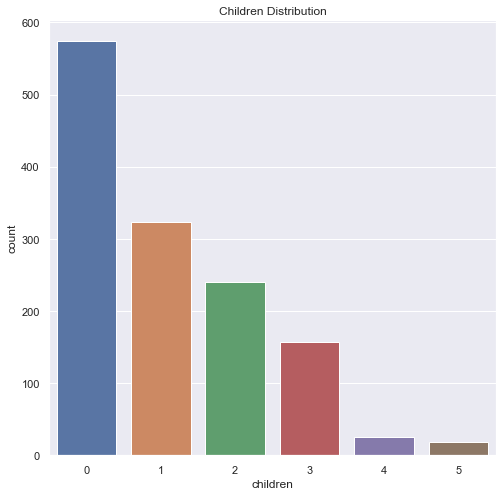

In [12]:
# children column
sns.set()
plt.figure(figsize=(8, 8))
sns.countplot(x = 'children', data=insurance_dataset)
plt.title("Children Distribution")

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker Count')

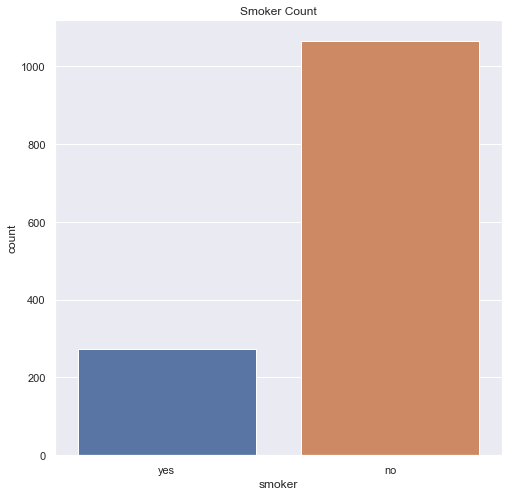

In [16]:
# smoke column
sns.set()
plt.figure(figsize=(8, 8))
sns.countplot(x = 'smoker', data=insurance_dataset)
plt.title("Smoker Count")

Text(0.5, 1.0, 'Region Count')

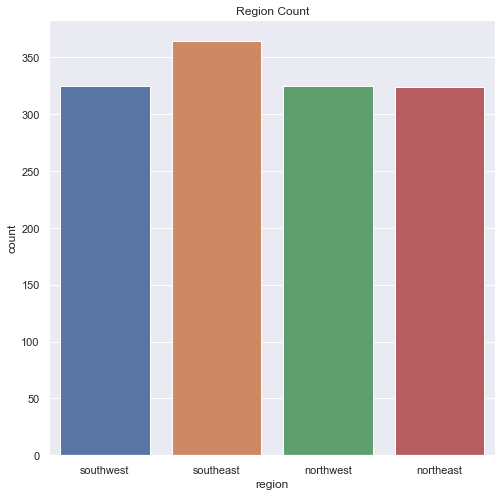

In [17]:
# region column
sns.set()
plt.figure(figsize=(8, 8))
sns.countplot(x = 'region', data=insurance_dataset)
plt.title("Region Count")

Text(0.5, 1.0, 'Charges Distribution')

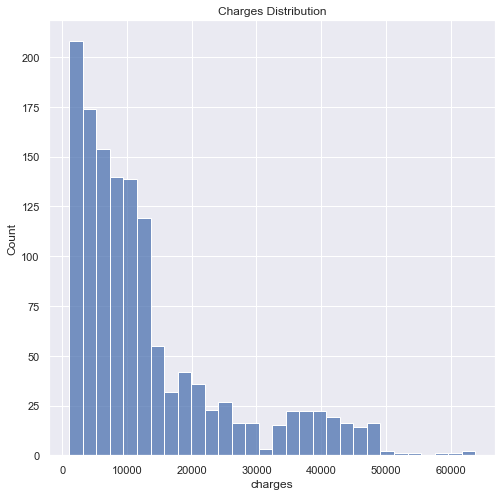

In [18]:
# charges distribution
sns.set()
plt.figure(figsize=(8, 8))
sns.histplot(insurance_dataset['charges'])
plt.title("Charges Distribution")

Encoding the categorical features

In [19]:
# encoding the sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

In [20]:
# encoding the smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

In [23]:
# encoding the region column
insurance_dataset.replace({
    'region': {
        'southeast': 0,
        'southwest': 1,
        'northeast': 2,
        'northwest': 3
    }
}, inplace=True)

In [24]:
# spliting the features and target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
# Model evaluation
training_data_prediction = model.predict(X_train)

In [29]:
# R squared error on training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error on training data: ", r2_train)

R squared error on training data:  0.751505643411174


In [30]:
test_data_prediction = model.predict(X_test)

# R squared error on test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error on test data: ", r2_test)

R squared error on test data:  0.7447273869684077
